In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = "https://www.openml.org/data/get_csv/184157/phpfGCaQC.csv"

!wget $data

--2021-10-31 05:32:16--  https://www.openml.org/data/get_csv/184157/phpfGCaQC.csv
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘phpfGCaQC.csv’

phpfGCaQC.csv           [    <=>             ]   2.75M  2.74MB/s    in 1.0s    

2021-10-31 05:32:18 (2.74 MB/s) - ‘phpfGCaQC.csv’ saved [2885823]



#### Read the data and do the basic EDA

In [3]:
df = pd.read_csv('click_data.csv')

In [4]:
df.head()

,click,impression,url_hash,ad_id,advertiser_id,depth,position,query_id,keyword_id,title_id,description_id,user_id
0,0,1,1.071003e+19,8343295,11700,3,3,7702266,21264,27892,1559,0
1,1,1,1.736385e+19,20017077,23798,1,1,93079,35498,4,36476,562934
2,0,1,8.915473e+18,21348354,36654,1,1,10981,19975,36105,33292,11621116
3,0,1,4.426693e+18,20366086,33280,3,3,0,5942,4057,4390,8778348
4,0,1,1.157260e+19,6803526,10790,2,1,9881978,60593,25242,1679,12118311


In [5]:
df.describe()

,click,impression,url_hash,ad_id,advertiser_id,depth,position,query_id,keyword_id,title_id,description_id,user_id
count,39948.000000,39948.000000,3.994800e+04,3.994800e+04,39948.000000,39948.000000,39948.000000,3.994800e+04,3.994800e+04,3.994800e+04,3.994800e+04,3.994800e+04
mean,0.168419,2.100205,9.641350e+18,1.601672e+07,22454.496546,1.960023,1.463853,3.142146e+06,3.519443e+04,1.732829e+05,1.111509e+05,3.669622e+06
std,0.374243,65.867383,4.986705e+18,7.222260e+06,11796.085798,0.715407,0.631545,5.841540e+06,1.009148e+05,4.656748e+05,3.283742e+05,5.492058e+06
min,0.000000,1.000000,4.824369e+14,1.000515e+06,82.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,1.000000,5.468728e+18,9.027238e+06,13476.500000,1.000000,1.000000,2.364250e+03,3.700000e+02,6.707500e+02,3.560000e+02,1.472250e+03
50%,0.000000,1.000000,1.034947e+19,2.030373e+07,23808.000000,2.000000,1.000000,1.128365e+05,3.389000e+03,1.065400e+04,5.048000e+03,8.883865e+05
75%,0.000000,1.000000,1.434039e+19,2.116392e+07,32124.000000,2.000000,2.000000,3.147909e+06,2.103000e+04,1.002895e+05,5.286175e+04,5.129631e+06
max,1.000000,11820.000000,1.844094e+19,2.222734e+07,39074.000000,3.000000,3.000000,2.624010e+07,1.243163e+06,4.050208e+06,3.171504e+06,2.390734e+07


In [6]:
df.click.isna().sum()

0

In [7]:
df.isna().sum()

click             0
impression        0
url_hash          0
ad_id             0
advertiser_id     0
depth             0
position          0
query_id          0
keyword_id        0
title_id          0
description_id    0
user_id           0
dtype: int64

#### Target variable is click. 
#### Data doesn't seem to have any missing values.

In [8]:
df.click.value_counts()

0    33220
1     6728
Name: click, dtype: int64

#### As we can see above, click 0 has more occurences than click 1. 
#### Note: The original dataset already had this class imbalance and in the downloaded csv, downsampling of the majority class (click=0) has been done so that the target feature is reasonably balanced (5 to 1). 

### Data Preparation for training. Splitting the data to train/validation/test sets.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [11]:
len(df_train), len(df_val), len(df_test)

(23968, 7990, 7990)

In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
y_train = df_train.click.values
y_val = df_val.click.values
y_test = df_test.click.values

del df_train['click']
del df_val['click']
del df_test['click']

### EDA

#### Check the value counts of click variable to understand the imbalance

In [14]:
df_full_train.click.value_counts(normalize=True)

0    0.830621
1    0.169379
Name: click, dtype: float64

#### As you can see above 83% of the data has click 0 and 16% has click 1.

#### Lets try to do Feature Importance to identify which features are affecting the target variable Click

In [15]:
corr_mat = df_full_train.corrwith(df.click).abs()
corr_mat

click             1.000000
impression        0.023952
url_hash          0.008151
ad_id             0.018725
advertiser_id     0.030278
depth             0.052021
position          0.123598
query_id          0.077591
keyword_id        0.030610
title_id          0.015195
description_id    0.007121
user_id           0.079518
dtype: float64

#### Position where the Ad has been displayed seems to be more correlated to the click than other attributes.

In [16]:
df_full_train.head()

,click,impression,url_hash,ad_id,advertiser_id,depth,position,query_id,keyword_id,title_id,description_id,user_id
20749,0,2,1.245930e+19,21431057,36677,2,2,13702,2170,7232,7399,193679
16666,0,1,2.549832e+17,21219574,36195,2,1,12567,7956,121718,61582,1065818
15000,0,1,1.124352e+19,21116978,35398,3,1,5929258,4899,16433,29678,0
26903,0,1,1.434039e+19,21163923,23808,2,1,105522,3120,5427,37,2304994
4383,0,1,9.454445e+18,9682594,17036,2,1,9637273,25351,100649,102203,4405908


#### Since column url_hash has very big values and also as we can see from the correlation matrix that its correlation to the target variable is very less (0.008), removing the column for training purpose.

In [17]:
df_train_cpy = df_train.copy()
df_train_cpy.columns

df_train = df_train.drop(['url_hash'],axis=1)

df_val_cpy = df_val.copy()
df_val = df_val.drop(['url_hash'],axis=1)

### LogisticRegression

In [18]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [19]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
accuracy_score(y_val, y_pred >= 0.5)

0.8369211514392991

In [22]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

scores

0.00 0.163
0.05 0.181
0.10 0.254
0.15 0.450
0.20 0.593
0.25 0.656
0.30 0.745
0.35 0.785
0.40 0.809
0.45 0.827
0.50 0.837
0.55 0.837
0.60 0.837
0.65 0.837
0.70 0.837
0.75 0.837
0.80 0.837
0.85 0.837
0.90 0.837
0.95 0.837
1.00 0.837


[0.16257822277847309,
 0.18135168961201503,
 0.2536921151439299,
 0.45043804755944933,
 0.592866082603254,
 0.6555694618272842,
 0.7451814768460576,
 0.7847309136420526,
 0.8085106382978723,
 0.8266583229036295,
 0.8369211514392991,
 0.83729662077597,
 0.83729662077597,
 0.8374217772215269,
 0.8374217772215269,
 0.8374217772215269,
 0.8374217772215269,
 0.8374217772215269,
 0.8374217772215269,
 0.8374217772215269,
 0.8374217772215269]

#### As you can see above, setting the threshold value of 0.5 seems to be the best for predicting accuracy score. 

#### Confusion Table for evaluation

In [23]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[6687,    4],
       [1299,    0]])

#### Dataset seems to have been divided in such a way that true positive value is 0. We need to perform Cross Validation in the dataset to train the model in various different subsets.

In [24]:
from sklearn.metrics import roc_auc_score

In [25]:
roc_auc_score(y_val, y_pred)

0.5633788864639446

#### Though the accuracy score is 83% we see that roc_auc_score is 56% and the Precision and Recall we are unable to calculate properly due to the distribution of the dataset. 

#### Applying Cross-Validation using KFold

In [26]:
def train(df_train, y_train, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [27]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [28]:
def precision_and_recall(y_val,y_pred):
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    t = 0.5
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    p, r

In [29]:
from sklearn.model_selection import KFold

In [30]:

df_full_train_cpy = df_full_train.copy()
df_full_train = df_full_train.drop(['url_hash'],axis=1)

In [31]:
n_splits = 5

for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []
    precision = []
    recall = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.click.values
        y_val = df_val.click.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        print('C=%s %.6f +- %.6f' % (C, np.mean(scores), np.std(scores)))
    

    

C=0.001 0.568348 +- 0.000000
C=0.001 0.560483 +- 0.007866
C=0.001 0.561084 +- 0.006478
C=0.001 0.564312 +- 0.007920
C=0.001 0.563848 +- 0.007145
C=0.01 0.568362 +- 0.000000
C=0.01 0.560490 +- 0.007872
C=0.01 0.561089 +- 0.006483
C=0.01 0.564317 +- 0.007923
C=0.01 0.563854 +- 0.007147
C=0.1 0.568356 +- 0.000000
C=0.1 0.560487 +- 0.007870
C=0.1 0.561087 +- 0.006481
C=0.1 0.564315 +- 0.007923
C=0.1 0.563851 +- 0.007147
C=0.5 0.568362 +- 0.000000
C=0.5 0.560489 +- 0.007872
C=0.5 0.561089 +- 0.006483
C=0.5 0.564316 +- 0.007923
C=0.5 0.563853 +- 0.007147
C=1 0.568362 +- 0.000000
C=1 0.560490 +- 0.007872
C=1 0.561089 +- 0.006483
C=1 0.564316 +- 0.007923
C=1 0.563852 +- 0.007148
C=5 0.568356 +- 0.000000
C=5 0.560487 +- 0.007870
C=5 0.561093 +- 0.006483
C=5 0.564319 +- 0.007920
C=5 0.563854 +- 0.007145
C=10 0.568362 +- 0.000000
C=10 0.560489 +- 0.007872
C=10 0.561095 +- 0.006485
C=10 0.564321 +- 0.007922
C=10 0.563856 +- 0.007147


#### Most of the C parameter values are almost similar. Hence deciding on C=0.01

### Performing Logistic Regression on validation dataset provides an accuracy score of 0.568362

### Ridge Model

In [32]:
from sklearn.linear_model import Ridge

In [36]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.click.values
y_val = df_val.click.values
y_test = df_test.click.values

del df_train['click']
del df_val['click']
del df_test['click']

df_train_cpy = df_train.copy()
df_train.columns

df_train = df_train.drop(['url_hash'],axis=1)

df_val_cpy = df_val.copy()
df_val = df_val.drop(['url_hash'],axis=1)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)


In [37]:
ridge_model = Ridge(alpha=0, random_state=42)
ridge_model.fit(X_train,y_train)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = ridge_model.predict(X_val)
y_pred

array([0.19499961, 0.18158732, 0.14696818, ..., 0.18989415, 0.11764419,
       0.19259215])

In [38]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [39]:
score_with_alpha_0 = rmse(y_val, y_pred) 
score_with_alpha_0.round(3)

0.49

In [40]:
for a in [0, 0.01, 0.1, 1, 10]:
    ridge_model = Ridge(alpha=a, random_state=42)
    ridge_model.fit(X_train,y_train)
    y_pred = ridge_model.predict(X_val)
    score = rmse(y_val, y_pred)
    print('alpha, score', a, score)

alpha, score 0 0.48964901633762403
alpha, score 0.01 0.4896490148661009
alpha, score 0.1 0.48964900162347835
alpha, score 1 0.48964886930474527
alpha, score 10 0.48964755683318206


#### As you can see above tuning alpha parameter is not having much of a difference in the scores. Hence alpha = 0 is good enough for the Ridge model

### RMSE score with Ridge model on the Validation Dataset is 0.489. This is lower than what we observed performing Logistic Regression.

### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [42]:
dt = DecisionTreeClassifier(max_depth=1,random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [43]:
y_pred = dt.predict_proba(X_val)[:, 1]
score_depth_1 = roc_auc_score(y_val, y_pred)
score_depth_1

0.5663410537680653

#### Lets tune the max_depth and min_samples_leaf parameter and see if the score improves

In [44]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth,random_state=42)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.566
   2 -> 0.619
   3 -> 0.635
   4 -> 0.649
   5 -> 0.662
   6 -> 0.672
  10 -> 0.652
  15 -> 0.607
  20 -> 0.578
None -> 0.559


#### max_depth = [5, 6]  seems to give better scores. But to prevent overfitting lets take max_depth values [4,5,6] and tune the min_sample_leaf parameter

In [45]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s,random_state=42)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [46]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.649  0.662  0.672
5                 0.649  0.662  0.673
10                0.649  0.663  0.674
15                0.649  0.664  0.675
20                0.649  0.664  0.675
100               0.650  0.664  0.672
200               0.650  0.663  0.672
500               0.651  0.659  0.665

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

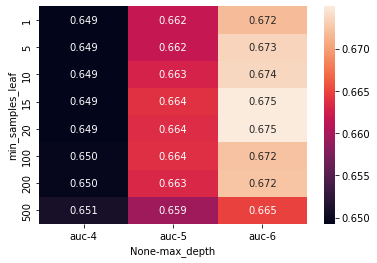

In [47]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")


#### As we can see score seems to be more for max_depth=6 and min_samples_leaf = [15, 20]

In [48]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15,random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15, random_state=42)

In [49]:
print(export_text(dt, feature_names=dv.get_feature_names()))


|--- user_id <= 239403.00
|   |--- impression <= 6.50
|   |   |--- impression <= 1.50
|   |   |   |--- keyword_id <= 357352.00
|   |   |   |   |--- user_id <= 26258.50
|   |   |   |   |   |--- depth <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- depth >  2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- user_id >  26258.50
|   |   |   |   |   |--- query_id <= 64455.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- query_id >  64455.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- keyword_id >  357352.00
|   |   |   |   |--- user_id <= 60201.00
|   |   |   |   |   |--- description_id <= 11202.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- description_id >  11202.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- user_id >  60201.00
|   |   |   |   |   |--- user_id <= 130287.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- user_id >  130287.00
|   |   |   |   |   |   |--- class: 

In [50]:
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.6749926279472535

### Score with Decision Tree Classifier was 0.675

### RandomForest

In [51]:
from sklearn.ensemble import RandomForestClassifier

#### Tuning the n_estimators parameter for the RandomForestClassifier

In [52]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

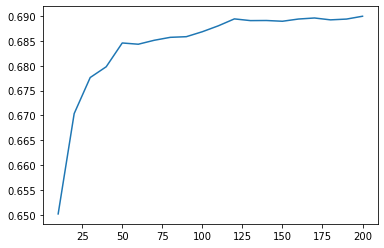

In [53]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators, df_scores.auc)

#### As seen above around n_estimators=120 the model provides best accuracy after which it stays stagnant.

#### Tuning the max_depth parameter

In [54]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [55]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

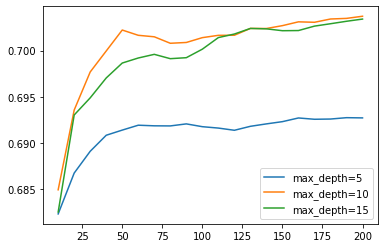

In [56]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

#### Fixing max_depth = 10 as this seems to be performing well

In [57]:
max_depth = 10

#### Tuning the min_samples_leaf parameter

In [58]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [59]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

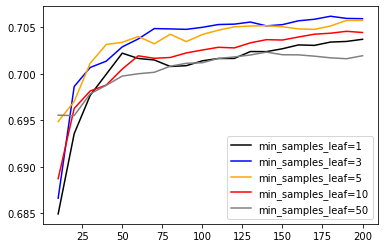

In [60]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

#### As seen in the plot min_samples_leaf = 3 seems to have better performance

In [61]:
min_samples_leaf = 3

In [62]:
rf = RandomForestClassifier(n_estimators=125,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=125,
                       random_state=1)

In [63]:
y_pred = rf.predict_proba(X_val)[:, 1]
score_with_rf = roc_auc_score(y_val, y_pred)
score_with_rf

0.7054710468452964

### Score with RandomForestClassifier = 0.7115

#### Training Data with XGBoost

In [64]:
conda install -c conda-forge xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [65]:
import xgboost as xgb

In [66]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [67]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

[05:53:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [68]:
y_pred = model.predict(dval)

In [69]:
roc_auc_score(y_val, y_pred)


0.6984379992243094

In [70]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [71]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [72]:
s = output.stdout
print(s[:200])

[0]	train-auc:0.70342	val-auc:0.67358
[5]	train-auc:0.74047	val-auc:0.69320
[10]	train-auc:0.76426	val-auc:0.69878
[15]	train-auc:0.78136	val-auc:0.70088
[20]	train-auc:0.79816	val-auc:0.70094
[25]	tr


In [73]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [74]:
scores = {}
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

#### Tuning XGBoost parameters

In [75]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [76]:

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [77]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [78]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [79]:
scores

{'eta=0.3':     num_iter  train_auc  val_auc
 0          0    0.70342  0.67358
 1          5    0.74047  0.69320
 2         10    0.76426  0.69878
 3         15    0.78136  0.70088
 4         20    0.79816  0.70094
 5         25    0.80960  0.70088
 6         30    0.82454  0.70523
 7         35    0.83625  0.70389
 8         40    0.84709  0.70362
 9         45    0.85358  0.70219
 10        50    0.86198  0.69998
 11        55    0.86941  0.69844
 12        60    0.87641  0.69860
 13        65    0.88206  0.70006
 14        70    0.88726  0.70038
 15        75    0.89247  0.69970
 16        80    0.90102  0.69936
 17        85    0.90673  0.69751
 18        90    0.91150  0.69764
 19        95    0.91636  0.69792
 20       100    0.92215  0.69762
 21       105    0.92700  0.69654
 22       110    0.93031  0.69760
 23       115    0.93501  0.69744
 24       120    0.93660  0.69626
 25       125    0.93954  0.69556
 26       130    0.94319  0.69506
 27       135    0.94686  0.69541
 28

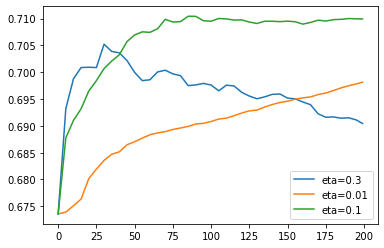

In [80]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)


plt.legend()

#### As seen above eta=0.1 seems to provide good score

#### Tuning max_depth parameter

In [81]:
scores = {}

In [82]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [83]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

In [84]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [85]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=3'

In [86]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [87]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=4'

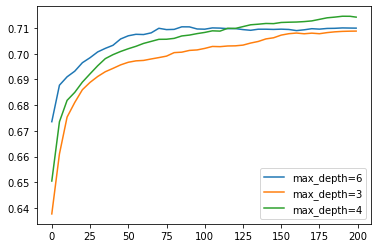

In [88]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)


plt.legend()

#### All the three values seems to be performing similar though max_depth=6 seems to remain consistent after reaching its peak. Hence choosing max_depth=6 for the model

#### Tuning min_child_weight parameter

In [89]:
scores = {}

In [90]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [91]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

In [92]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [93]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=10'

In [94]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [95]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

In [ ]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)


plt.legend()

#### As seen in the plot, all the values are quite similar. Choosing min_child_weight=10

### Selecting final model

#### Logistic Regression and Ridge regression doesn't seem to provide a good score. Hence choosing between DecisionTree/RandomForest/XGBoost

In [ ]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15,random_state=42)
dt.fit(X_train, y_train)

In [ ]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

In [ ]:
rf = RandomForestClassifier(n_estimators=125,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

In [ ]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [ ]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

### Choosing XGBoost as that seems to be provide the higher score compared to others

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)

In [ ]:
y_full_train = df_full_train.click.values

In [ ]:
del df_full_train['click']

In [ ]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [ ]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

In [ ]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [ ]:
y_pred = model.predict(dtest)

In [ ]:
roc_auc_score(y_test, y_pred)

#### As seen above the roc_auc_score in the test dataset (0.7057)  seems to be close to the validation score  (0.7102)